#**Color Distribution Analysis**

##In this section, the analysis focuses on color intensity based on the minimum number of clusters required to represent the distribution effectively. The graphical representations illustrate how red and blue colors are distributed across the sample. These visuals highlight the degree of color mixing, providing insight into how seamlessly the red and blue pigments are blended. As a result of this mixing, various intermediate shades are formed, depending on the relative intensity and proportion of each primary color. This analysis not only demonstrates the quality of color integration but also helps in understanding the color variations produced by different color mixing ratios.

##Color Density versus Intensity of each cluster

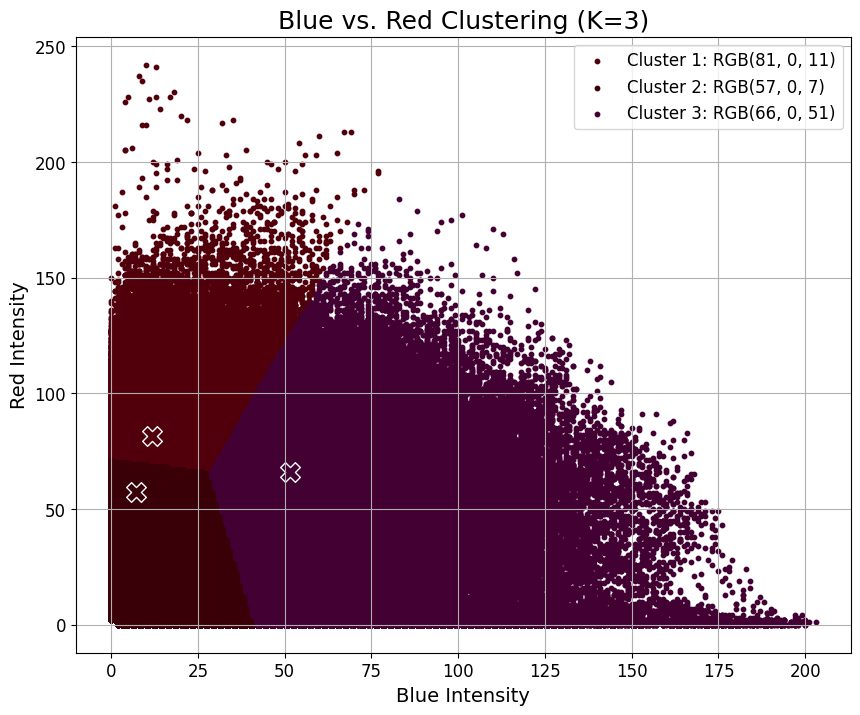

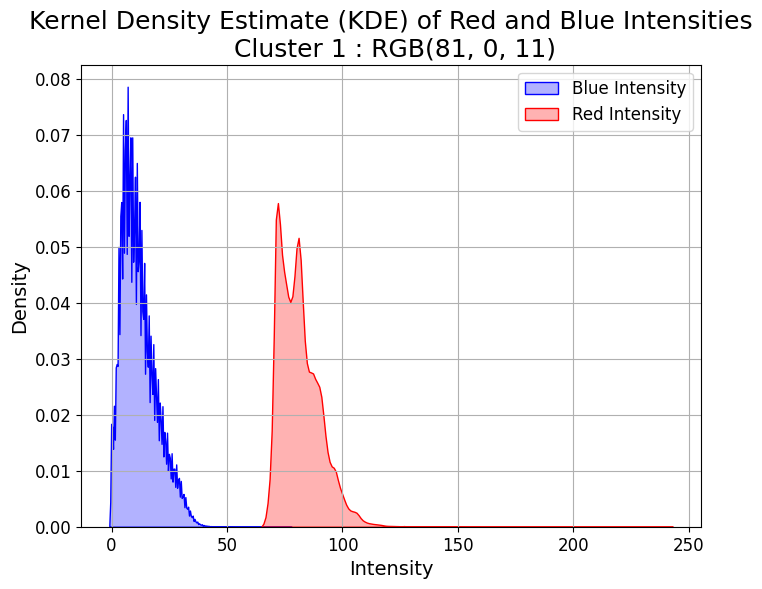

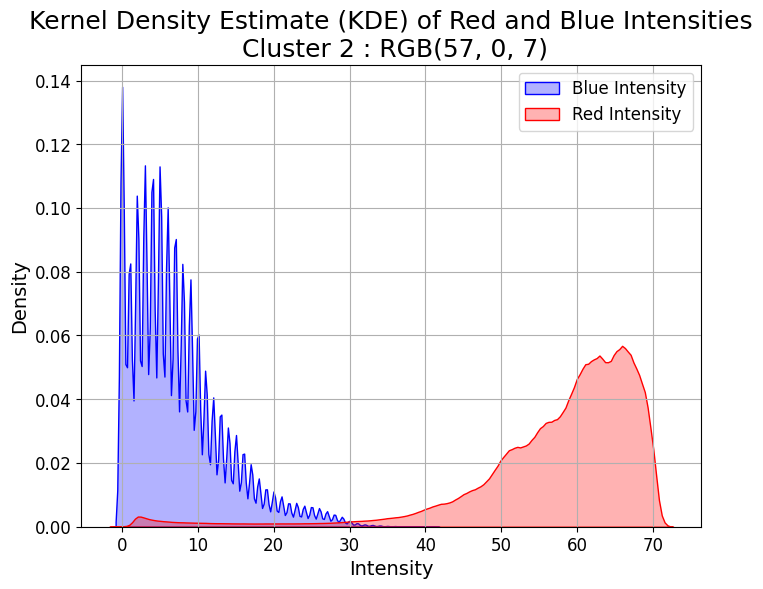

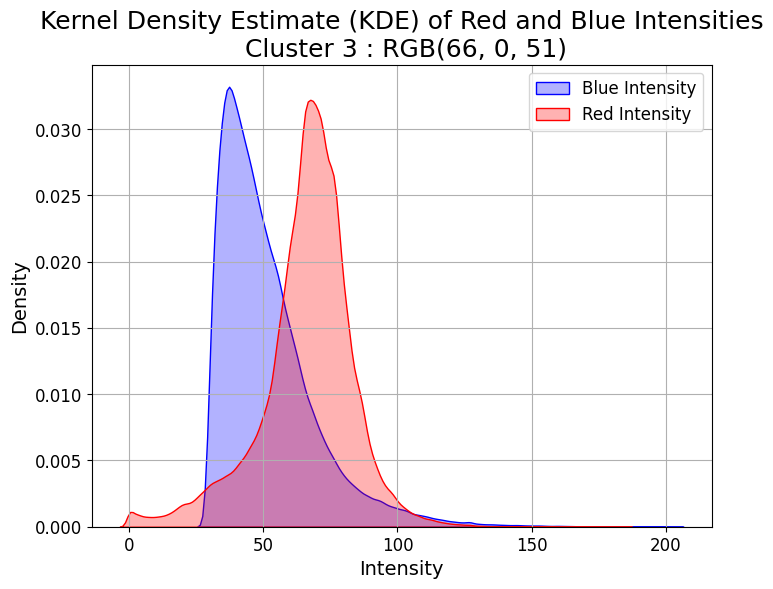

In [ ]:
########  Graphical presentation ######################
#####################################################
##############################################################

######################
black_co_rem = 1
#####################
# Input: Number of clusters
######################################## Adjust the number of clusters as needed
n_clusters = 3 ######################################## Adjust the number of clusters as needed
######################################## Adjust the number of clusters as needed




# Load the image
image_path = './sample_data/cap_img_03.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert the image to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Separate the channels
redArray, greenArray, blueArray = cv2.split(image_rgb)

# Flatten the arrays for clustering
flat_red = redArray.flatten()
flat_blue = blueArray.flatten()

# Combine blue and red intensities into a 2D array for clustering
br_pixels = np.stack((flat_blue, flat_red), axis=1)

# Eliminate black pixels (where both red and blue intensities are near zero)
non_black_mask = np.any(br_pixels > black_co_rem, axis=1)  # Threshold for black pixels
br_pixels_non_black = br_pixels[non_black_mask]

# Input: Number of clusters
######################################## Adjust the number of clusters as needed
#n_clusters = 4  ######################################## Adjust the number of clusters as needed
######################################## Adjust the number of clusters as needed

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(br_pixels_non_black)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Generate cluster colors based on center points
cluster_colors = [(int(r), 0, int(b)) for b, r in centers]

# Plotting: Blue vs. Red with Clustering
plt.figure(figsize=(10, 8))

for i in range(n_clusters):
    # Extract points for the current cluster
    cluster_points = br_pixels_non_black[labels == i]
    # Normalize the cluster color to the 0-1 range for matplotlib
    cluster_color_normalized = np.array(cluster_colors[i]) / 255
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        s=10,
        color=cluster_color_normalized,
        label=f'Cluster {i+1}: RGB{cluster_colors[i]}',
    )

# Plot cluster centers
for i, (b, r) in enumerate(centers):
    plt.scatter(
        b, r, s=200, color=np.array(cluster_colors[i]) / 255, marker='X', edgecolor='white'
    )

# Set plot details
plt.title(f'Blue vs. Red Clustering (K={n_clusters})',fontsize=18)
plt.xlabel('Blue Intensity',fontsize=14)
plt.ylabel('Red Intensity',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('./sample_data/cap_img_dis_01.png', dpi=400)
plt.show()

#####################################
###########################################
# Extract red and blue intensities
blue_intensities = br_pixels_non_black[:, 0]
red_intensities = br_pixels_non_black[:, 1]

# Plot KDE for each cluster in separate figures
for i in range(n_clusters):
    cluster_mask = labels == i
    cluster_blue = blue_intensities[cluster_mask]
    cluster_red = red_intensities[cluster_mask]

    # Get the color code for the current cluster
    cluster_color = cluster_colors[i]
    color_code = f"RGB({cluster_color[0]}, {cluster_color[1]}, {cluster_color[2]})"

    plt.figure(figsize=(8, 6))
    sns.kdeplot(cluster_blue, label="Blue Intensity", color="blue", fill=True, alpha=0.3)
    sns.kdeplot(cluster_red, label="Red Intensity", color="red", fill=True, alpha=0.3)
    plt.title(f"Kernel Density Estimate (KDE) of Red and Blue Intensities\n Cluster {i+1} : {color_code}",fontsize=18)
    plt.xlabel("Intensity",fontsize=14)
    plt.ylabel("Density",fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.savefig(f'./sample_data/cap_img_sep_dis_0{i}.png', dpi=400)
    plt.show()




## Color Distribution by Clusters using Pie Chart

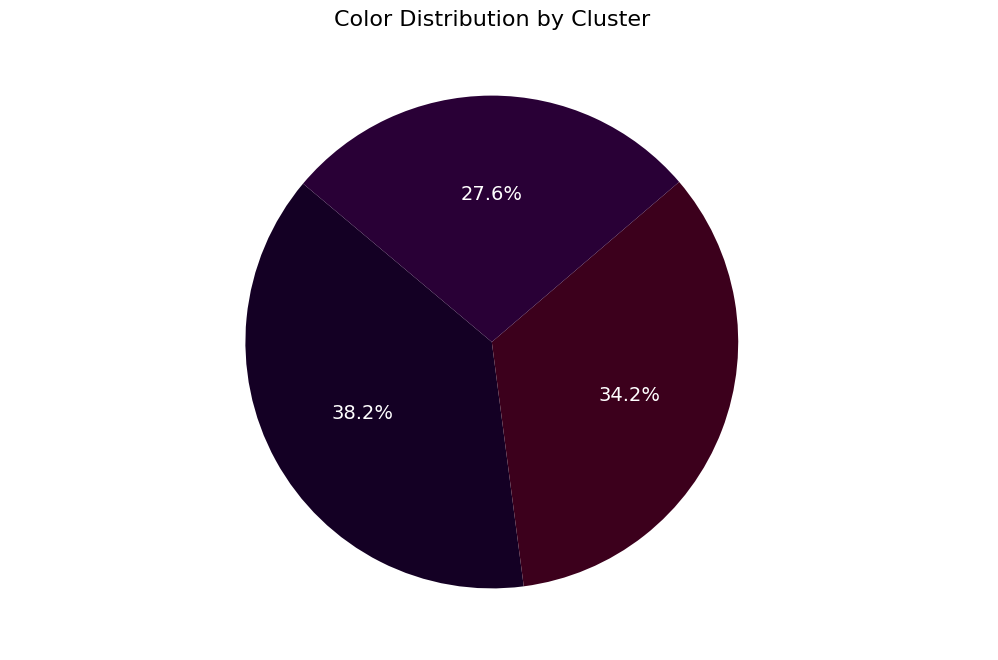

In [ ]:
# Ensure labels are integers (from KMeans clustering)
labels = kmeans.labels_  # Ensure this is directly from the KMeans result

# Calculate the number of pixels in each cluster
cluster_counts = np.bincount(labels)

# Calculate the percentages for each cluster
cluster_percentages = (cluster_counts / len(labels)) * 100

# Define labels for the pie chart
pie_labels = [f"Cluster {i+1}: RGB{cluster_colors[i]}" for i in range(n_clusters)]

# Normalize the colors for matplotlib (convert RGB to 0-1 scale)
pie_colors = [tuple(np.array(color) / 255) for color in cluster_colors]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    cluster_percentages,
    labels=pie_labels,
    colors=pie_colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops ={'color': 'white','fontsize':14}
)
plt.title('Color Distribution by Cluster', fontsize=16)
plt.savefig('./sample_data/cap_img_pie_01.png', dpi=400)
plt.show()


## Color Distribution by Clusters using bar chart

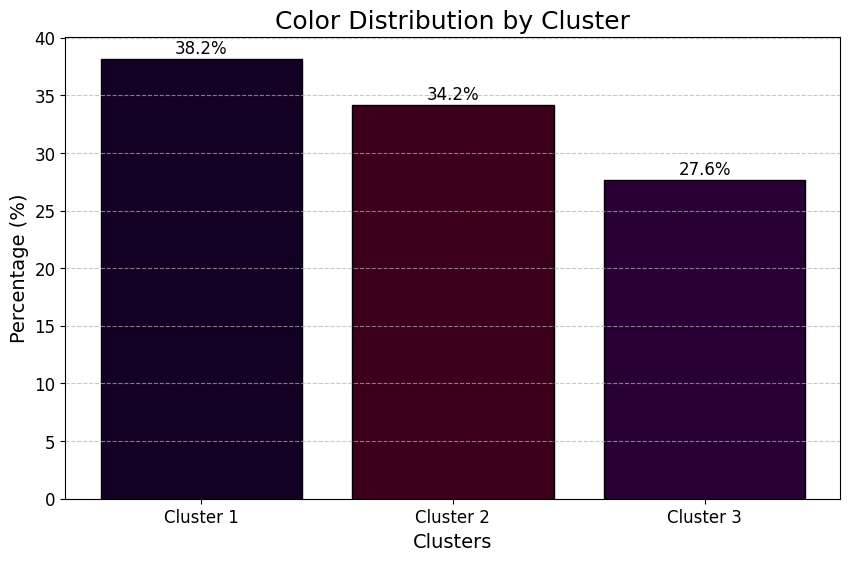

In [ ]:
# Ensure labels are integers (from KMeans clustering)
labels = kmeans.labels_  # Ensure this is directly from the KMeans result

# Calculate the number of pixels in each cluster
cluster_counts = np.bincount(labels)

# Calculate the percentages for each cluster
cluster_percentages = (cluster_counts / len(labels)) * 100

# Define colors for the bar chart (normalize RGB values)
bar_colors = [tuple(np.array(color) / 255) for color in cluster_colors]

# Define labels for the bar chart
bar_labels = [f"Cluster {i+1}" for i in range(n_clusters)]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    bar_labels,
    cluster_percentages,
    color=bar_colors,
    edgecolor='black'
)

# Annotate percentages on top of the bars
for bar, percentage in zip(bars, cluster_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{percentage:.1f}%",
        ha='center',
        fontsize=12
    )

# Set plot details
plt.title("Color Distribution by Cluster", fontsize=18)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("Clusters", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('./sample_data/cap_img_bar_01.png', dpi=400)
plt.show()
